## Textos Elegibles para los Experimentos

En el siguiente código selecciona aquellos indicadores que pueden ser objeto de estudio, esto considerando los siguentes criterios:
 
 * Cuenta con información reportada en AVANCE_CP
 * Cuenta con información reportada en META_AJUSTADA_CP
 * Cuenta con información reportada en SENTIDO
 
Se hace una estimación del valor que podría tener el avance, aunque existen algunos casos de TIPO_RELATIVO reportadas de menera diferente, la gran mayoría se presentan como una división entre el (AVANCE_CP / META_AJUSTADA_CP)*100.
 
 Sobre de este cálculo se dividen los indicadores en 3 categorias:
 * ALTO: Indicador que reporta más del 105% de avance
 * BAJO: Indicador que reporta menos del 95% de avance
 * CORRECTO: Indicador que reporta un avance mayor a 95% y menos al 105%.
 
Para todos los indicadores que son identificados con avance **BAJO** son divididos en 5 categorias según la distribución del  avance reportado.

In [1]:
#Bibliotecas mínimas requeridas
from preamble import *

#Funciones auxiliares
def estimation_meta(type_sense:str,reached:float,approved:float):
    if type_sense=='Ascendente':
        if approved!=0:
            return (reached/approved)*100
        else:
            return np.NaN
    if type_sense=='Descendente':
        if approved!=0:
            return (reached/approved)*100
        else: return np.NaN

def funct1(x):
    return estimation_meta(x[0],x[2],x[1])

In [2]:
#Ruta del archivo considerado como base
path1=Path('.').resolve().parent/'data'/'base'

In [3]:
#Se carga el archivo
data=pd.read_feather(path1)
print("Description of File")
print(data.info())

Description of File
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98701 entries, 0 to 98700
Columns: 130 entries, index to AVANCE_OTROS_MOTIVOS_POR_MES
dtypes: category(33), float64(29), int64(7), object(25), string(36)
memory usage: 76.9+ MB
None


In [4]:
# Visualización del Archivo
data.head()

,index,CICLO,ID_RAMO,DESC_RAMO,ID_UR,DESC_UR,ID_ENTIDAD_FEDERATIVA,ENTIDAD_FEDERATIVA,ID_MUNICIPIO,MUNICIPIO,GPO_FUNCIONAL,DESC_GPO_FUNCIONAL,ID_FUNCION,DESC_FUNCION,ID_SUBFUNCION,DESC_SUBFUNCION,ID_AI,DESC_AI,ID_MODALIDAD,DESC_MODALIDAD,ID_PP,DESC_PP,MODALIDAD_PP,ID_PND,DESC_PND,OBJETIVO_PND,PROGRAMA_PND,DESC_PROGRAMA_PND,OBJETIVO_PROGRAMA_PND,DESC_OBJETIVO_PROGRAMA_PND,OBJETIVO_ESTRATEGICO,ID_MATRIZ,DESC_MATRIZ,ID_OBJETIVO,ID_OBJETIVO_PADRE,DESC_OBJETIVO,SUPUESTOS,ID_NIVEL,DESC_NIVEL,ID_INDICADOR_CICLO_ANTERIOR,ID_INDICADOR,DESC_INDICADOR,INDICADOR_PND,DEFINICION_INDICADOR,METODO_CALCULO,TIPO_RELATIVO,FRECUENCIA,TIPO_INDICADOR,DIMENSION,UNIDAD_MEDIDA,OTRA_UNIDAD_MEDIDA,SENTIDO,UMBRAL_VERDE,UMBRAL_AMARILLO,UMBRAL_ROJO,MEDIOS_VERIFICACION,LINEA_BASE,CICLO_LINEA_BASE,META,META_NUM,META_DEN,META_ENERO_MAYO,META_ENERO_MAYO_NUM,META_ENERO_MAYO_DEN,META_AJUSTADA,META_AJUSTADA_NUM,META_AJUSTADA_DEN,META_AJUSTADA_ENERO_MAYO,META_AJUSTADA_ENERO_MAYO_NUM,META_AJUSTADA_ENERO_MAYO_DEN,META_AJUSTADA_CP,META_AJUSTADA_CP_NUM,META_AJUSTADA_CP_DEN,AVANCE_ENERO_MAYO,AVANCE_ENERO_MAYO_NUM,AVANCE_ENERO_MAYO_DEN,AVANCE_CP,AVANCE_CP_NUM,AVANCE_CP_DEN,JUSTIFICACION_AJUSTE,JUSTIFICACION_AJUSTE_ENERO_MAY,AVANCE_ENERO_MAYO_CAUSA,AVANCE_ENERO_MAYO_EFECTO,AVANCE_ENERO_MAYO_OTROS_MOTIVO,AVANCE_CAUSA_CP,AVANCE_EFECTO_CP,AVANCE_OTROS_MOTIVOS_CP,DENOMINADOR_LINEA_BASE,NUMERADOR_LINEA_BASE,LIGA,RECORDS_META_MES1,RECORDS_META_MES2,RECORDS_META_MES3,RECORDS_META_MES4,RECORDS_META_MES5,RECORDS_META_MES6,RECORDS_META_MES7,RECORDS_META_MES8,RECORDS_META_MES9,RECORDS_META_MES10,RECORDS_META_MES11,RECORDS_META_MES12,RECORDS_META_AJUSTADA_MES1,RECORDS_META_AJUSTADA_MES2,RECORDS_META_AJUSTADA_MES3,RECORDS_META_AJUSTADA_MES4,RECORDS_META_AJUSTADA_MES5,RECORDS_META_AJUSTADA_MES6,RECORDS_META_AJUSTADA_MES7,RECORDS_META_AJUSTADA_MES8,RECORDS_META_AJUSTADA_MES9,RECORDS_META_AJUSTADA_MES10,RECORDS_META_AJUSTADA_MES11,RECORDS_META_AJUSTADA_MES12,RECORDS_AVANCE_MES1,RECORDS_AVANCE_MES2,RECORDS_AVANCE_MES3,RECORDS_AVANCE_MES4,RECORDS_AVANCE_MES5,RECORDS_AVANCE_MES6,RECORDS_AVANCE_MES7,RECORDS_AVANCE_MES8,RECORDS_AVANCE_MES9,RECORDS_AVANCE_MES10,RECORDS_AVANCE_MES11,RECORDS_AVANCE_MES12,JUSTIFICACIONES_AJUSTE_POR_MES,AVANCE_CAUSA_POR_MES,AVANCE_EFECTO_POR_MES,AVANCE_OTROS_MOTIVOS_POR_MES
0,0,2013,4,Gobernación,300,Subsecretaría de Enlace Legislativo y Acuerdos...,NaN,NaN,NaN,NaN,1,Gobierno,3,Coordinación de la Política de Gobierno,2,Coordinación de la Política de Gobierno,6,Política interior y las relaciones del Ejecuti...,P,"Planeación, seguimiento y evaluación de políti...",16,Fortalecimiento de las instituciones democráti...,P 016,1,México en Paz,1\tPromover y fortalecer la gobernabilidad dem...,NaN,NaN,NaN,NaN,Mantener la estabilidad y gobernabilidad democ...,511754,Fortalecimiento de las instituciones democráti...,9411,-1,Impulsar las reformas legislativas que transfo...,Que la presentación de asuntos legislativos de...,1,Fin,71478,81685,Porcentaje de asuntos legislativos que implica...,N,Mide los asuntos legislativos que implican reg...,[(Número de asuntos legislativos a los que la ...,(A/B)*100,Semestral,Estratégico,Eficacia,Porcentaje,None,Ascendente,70.0,NaN,60.0,reportes estadisticos generados por la Subsecr...,95.00,2013,95.00,5320.0,5600.0,39.5,2212.0,5600.0,NaN,NaN,NaN,NaN,NaN,NaN,95.00,5320.0,5600.0,44.57,2496.0,5600.0,112.38,6293.0,5600.0,None,NaN,Durante el mes de mayo se observa un decrement...,NaN,None,"Durante el segundo semestre del año, hubo mayo...",El indicador presentó un incremento considerab...,None,NaN,NaN,ND,<NA>,<NA>,<NA>,<NA>,<NA>,47.5:2660.0:5600.0,<NA>,<NA>,<NA>,<NA>,<NA>,95.0:5320.0:5600.0,<NA>,<NA>,<NA>,<NA>,<NA>,47.5:2660.0:5600.0,<NA>,<NA>,<NA>,<NA>,<NA>,95.0:5320.0:5600.0,<NA>,<NA>,<NA>,<NA>,<NA>,47.5:2660.0:5600.0,<NA>,<NA>,<NA>,<NA>,<NA>,95.0:5320.0:5600.0,#|#|#|#|#|#|#|#|#|#|#|#,#|#|#|#|#|Durante el mes de junio se observa u...,#|#|#|#|#|El indicador presentó un ligero incr...,#|#|#|#|#|#|#|#|#|#|#|#
1,1,2013,16,Medio Ambiente y Recursos

In [5]:
#Condiciones sobre AVANCE_CP y META_AJUSTADA_CP

Data=data.loc[(data.AVANCE_CP.notna()),:]\
         .loc[(data.META_AJUSTADA_CP.notna()),:]\
         .loc[(data.SENTIDO.notna()),:]

In [6]:
#Condiciones sobre los Textos
Len_Sentence_Txt=Data.AVANCE_CAUSA_CP.apply(lambda x: len(str(x).split()) if x!=None else 0)

In [7]:
#Se eligen todos los textos que tengan más de dos palabras.
Data=Data[Len_Sentence_Txt>=2].copy()

In [8]:
#Creación de la variable de Progreso de la Meta
V1=Data[['SENTIDO','META_AJUSTADA_CP','AVANCE_CP']].apply(funct1,axis=1)
Data.loc[:,'PROGRESO_META']=V1.copy()

In [9]:
#Creación de Categorías por el nivel de progreso reportado
Data.loc[:,'INDICADORA_CUMPLIMIENTO_AVANCE']='CORRETO'
Data.loc[Data.PROGRESO_META<95,'INDICADORA_CUMPLIMIENTO_AVANCE']='BAJO'
Data.loc[Data.PROGRESO_META>105,'INDICADORA_CUMPLIMIENTO_AVANCE']='ALTO'
Data.loc[Data.PROGRESO_META.isnull(),'INDICADORA_CUMPLIMIENTO_AVANCE']='ERROR'

In [10]:
#Revisión del conteo por categoría
Data['INDICADORA_CUMPLIMIENTO_AVANCE'].value_counts()

CORRETO    18200
ALTO       12577
BAJO       10753
ERROR       1255
Name: INDICADORA_CUMPLIMIENTO_AVANCE, dtype: int64

**Nota**: La categoria "ERROR" se genera debido a que el AVANCE_CP puede ser cero, por lo cual para los fines del proyecto no resultan relevantes.

In [11]:
#Segmentación de los indicadores con Progreso BAJO
Data.loc[Data.INDICADORA_CUMPLIMIENTO_AVANCE=='BAJO','SEGMENTOS_INCUMPLIMIENTOS']=\
pd.qcut(Data[Data.INDICADORA_CUMPLIMIENTO_AVANCE=='BAJO']['PROGRESO_META'],5,labels=False).values

Data['SEGMENTOS_INCUMPLIMIENTOS'].fillna(-1,inplace=True)

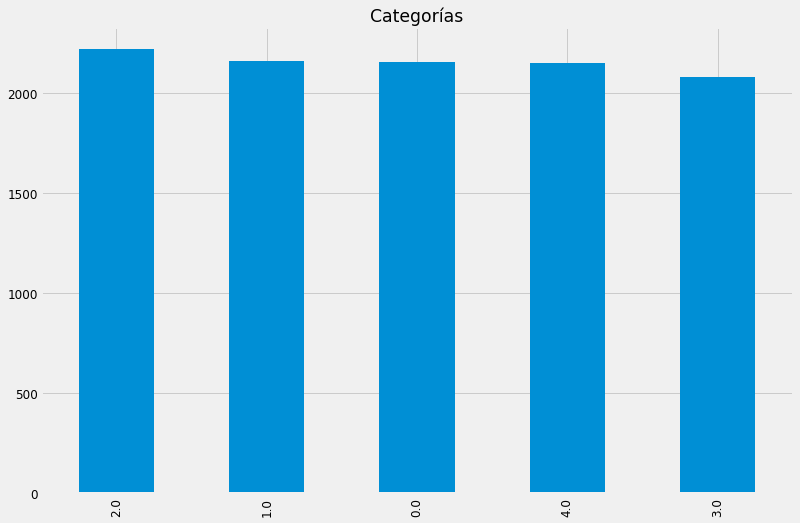

In [12]:
#Visualización de las categorias de los indicadores con nivel BAJO
Data[Data.INDICADORA_CUMPLIMIENTO_AVANCE=='BAJO']['SEGMENTOS_INCUMPLIMIENTOS']\
    .value_counts().plot(kind='bar',title='Categorías');

In [13]:
#Se omiten aquellos indicadores que el progreso es NaN
Data2=Data[Data.PROGRESO_META.notna()][['index','ID_INDICADOR','PROGRESO_META','INDICADORA_CUMPLIMIENTO_AVANCE','SEGMENTOS_INCUMPLIMIENTOS']]

In [14]:
#Visualización de las columnas más relevantes
Data2[['index','ID_INDICADOR','PROGRESO_META','INDICADORA_CUMPLIMIENTO_AVANCE','SEGMENTOS_INCUMPLIMIENTOS']].head()

,index,ID_INDICADOR,PROGRESO_META,INDICADORA_CUMPLIMIENTO_AVANCE,SEGMENTOS_INCUMPLIMIENTOS
0,0,81685,118.294737,ALTO,-1.0
2,2,95436,100.455233,CORRETO,-1.0
3,3,81477,100.000000,CORRETO,-1.0
4,4,77516,348.377704,ALTO,-1.0
6,6,82580,177.835951,ALTO,-1.0


In [15]:
#Se guarda el archivo en formato feather
path1=Path('.').resolve().parent/'data'/'base_txt_prog'
Data2.reset_index().to_feather(path1.as_posix())

In [16]:
#Base para los experimentos

Base_Textos=data[data['index'].isin(Data2['index'])][['index','ID_MATRIZ','ID_INDICADOR','AVANCE_CAUSA_CP','AVANCE_EFECTO_CP','AVANCE_OTROS_MOTIVOS_CP']].copy()

#Se guarda el archivo

path1=Path('.').resolve().parent/'data'/'base_txt'
Base_Textos.reset_index().to_feather(path1.as_posix())